In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [5]:
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30
plt.rcParams["font.family"] = "NanumGothic"


# 데이터 불러오기
- train 데이터 구조 : (3000,24)
- test 데이터 구조 : (2000,23)

In [10]:
import pandas as pd

train = pd.read_csv("./train.csv")
train = train.drop(columns = ["id"], axis = 1)


test = pd.read_csv("./test.csv")
test = test.drop(columns = ["id"], axis = 1)

submission = pd.read_csv("./sample_submission.csv")

print(f'train set은 {train.shape[1]} 개의 feature를 가진 {train.shape[0]} 개의 데이터 샘플로 이루어져 있습니다.')
print(train.shape)
train.head()

train set은 23 개의 feature를 가진 3000 개의 데이터 샘플로 이루어져 있습니다.
(3000, 23)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,...,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


In [11]:
print(f'test set은 {test.shape[1]} 개의 feature를 가진 {test.shape[0]} 개의 데이터 샘플로 이루어져 있습니다.')
print(test.shape)
test.head()

test set은 22 개의 feature를 가진 2000 개의 데이터 샘플로 이루어져 있습니다.
(2000, 22)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,61,Personal Travel,Eco,2037,1,1,1,1,...,5,5,5,5,5,3,5,3,51,58.0
1,Female,disloyal Customer,27,Business travel,Business,1846,1,1,1,4,...,1,1,3,4,5,4,4,1,0,0.0
2,Female,Loyal Customer,52,Business travel,Business,1622,4,4,4,4,...,4,5,5,5,5,4,5,3,0,0.0
3,Male,Loyal Customer,54,Business travel,Business,3534,4,4,4,4,...,5,2,2,2,2,5,2,1,0,0.0
4,Female,Loyal Customer,41,Business travel,Eco,1471,4,3,3,3,...,4,4,3,1,2,5,4,4,0,0.0


In [16]:
numeric_features = train.columns[(train.dtypes == "float64") | (train.dtypes == "int64")]

categorical_features = train.columns[(train.dtypes == "O")]

print("수치형 데이터는 다음과 같습니다. \n ", list(numeric_features))
print("\n")
print("범주형 데이터는 다음과 같습니다. \n ", list(categorical_features))

수치형 데이터는 다음과 같습니다. 
  ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target']


범주형 데이터는 다음과 같습니다. 
  ['Gender', 'Customer Type', 'Type of Travel', 'Class']


In [17]:
print(f"수치형 데이터 컬럼의 개수는 {len(numeric_features)}")
print(f"범주형 데이터 컬럼의 개수는 {len(categorical_features)}")

수치형 데이터 컬럼의 개수는 19
범주형 데이터 컬럼의 개수는 4


In [18]:
#결측치 있는지 확인하는 함수

def check_missing_col(dataframe):
    
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.\n')
            missing_col.append([col, dataframe[col].dtype])
    print(f'결측치가 있는 컬럼 의 개수는 {counted_missing_col} 입니다')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

    return missing_col




In [19]:
missing_col = check_missing_col(train)
print(missing_col)

결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다
[]


In [20]:
missing_col = check_missing_col(test)
print(missing_col)

결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다
[]


In [21]:
train.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


In [22]:
def numeric_histogram(df) :
    
    plt.style.use("ggplot")

    # 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
    plt.figure(figsize=(25,20))
    
    plt.suptitle("numeric histogram", fontsize=40)

    # id는 제외하고 시각화합니다.
    cols = df.columns
    for i in range(len(cols)):
        plt.subplot(5,5,i+1)
        plt.title(cols[i], fontsize=20, color = "black")
        if len(df[cols[i]].unique()) > 20:
            plt.hist(df[cols[i]], bins=20, color='b', alpha=0.7)
        else:
            temp = df[cols[i]].value_counts()
            plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
            plt.xticks(temp.keys())
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

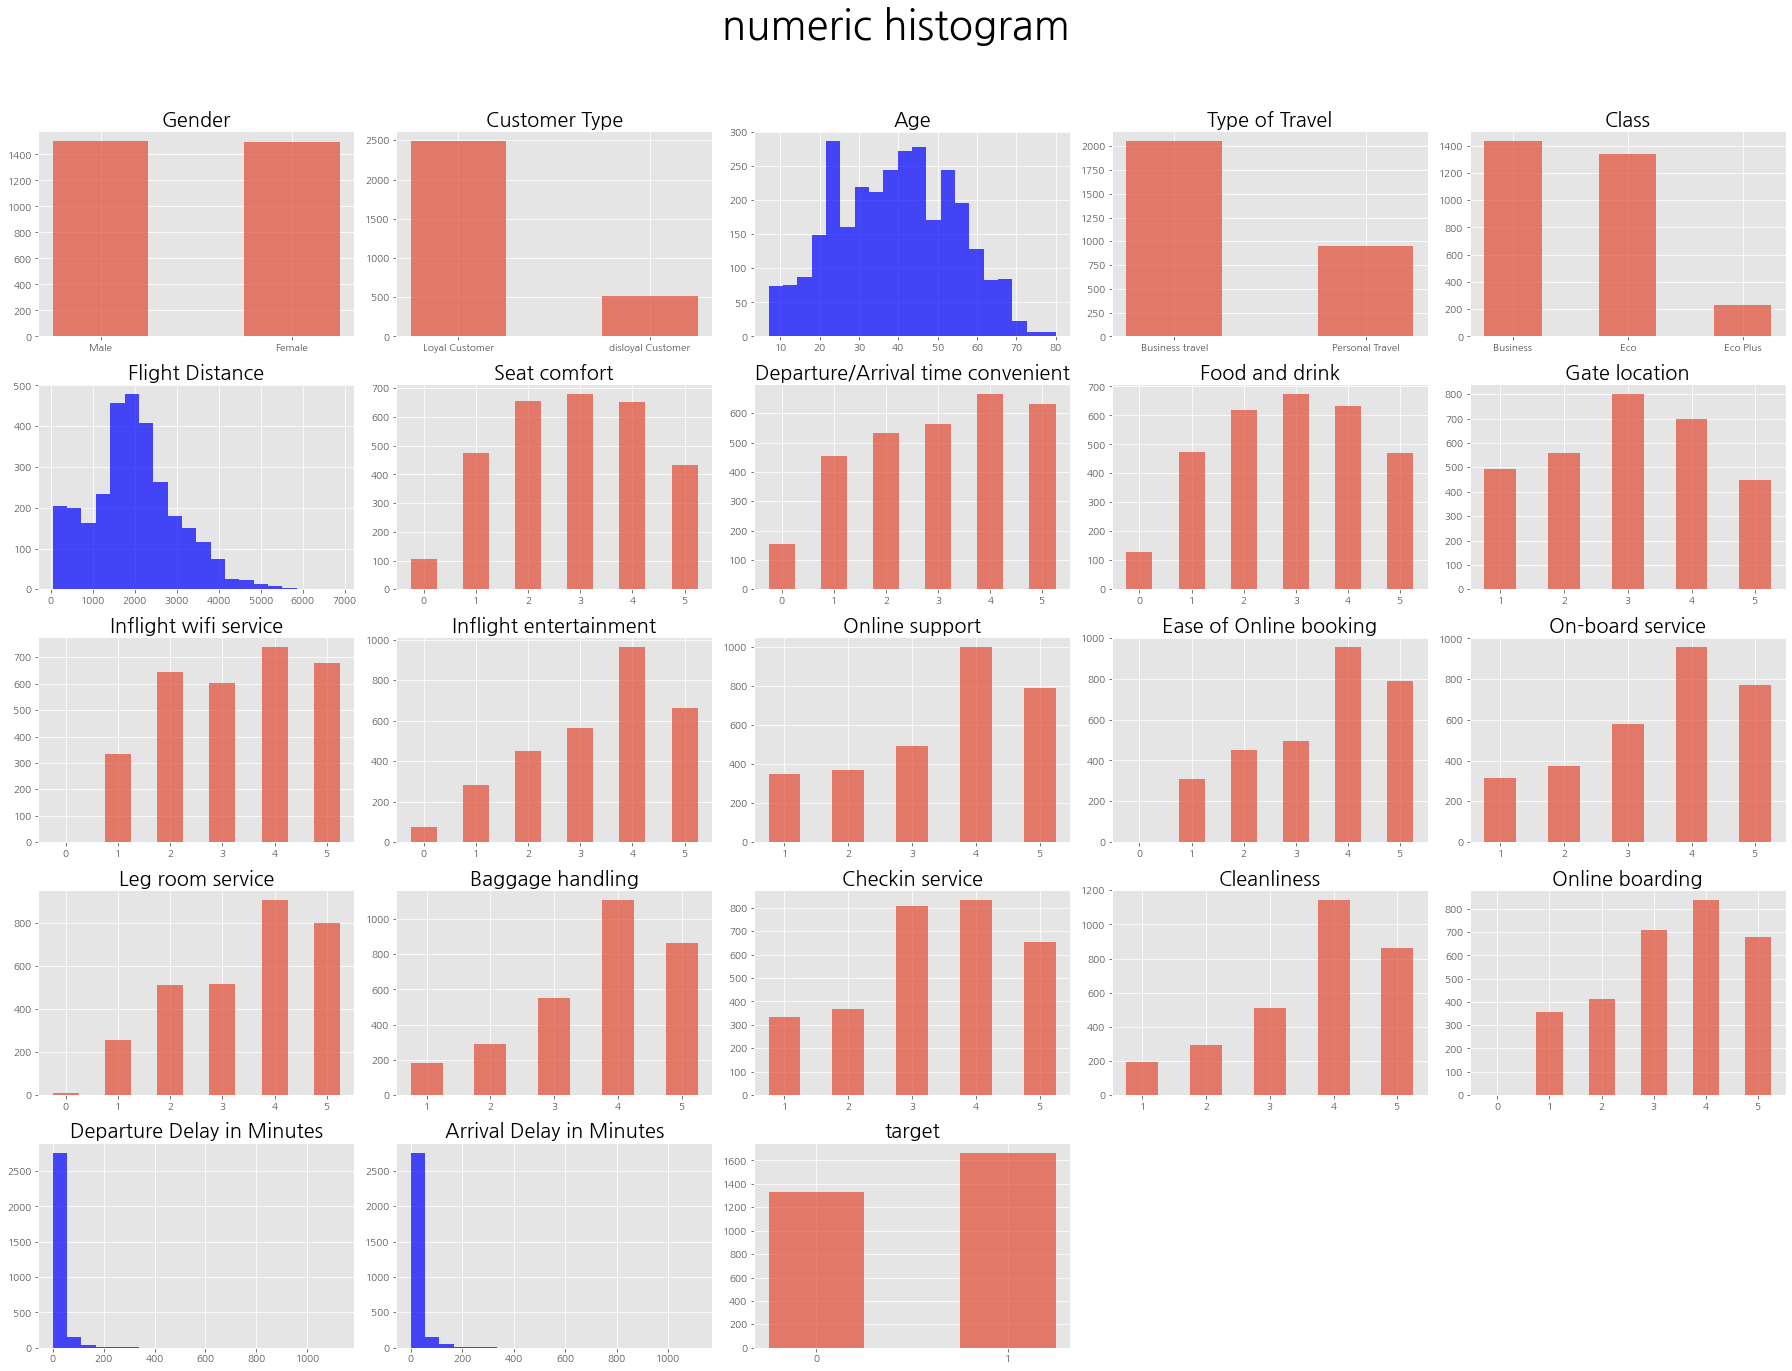

In [23]:
numeric_histogram(train)

### lastdefiance20 님 코드 참고
#  



데이터 훑어볼 때 두가지 우선적으로 살펴보기!
- 데이터의 분포가 상대적으로 매우 적은지 => 매우 적다면 범주를 합치거나 하는 등의 변환이 필요함
- 데이터의 분포가 극단적으로 치우쳐 있는지 => log 변환 등의 방법을 통해 정규화해주는 작업이 필요함  
#    


위의 일변량 그래프에서 주목해야할 점!
- Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes 등의 그래프가 왼쪽으로 치우쳐져 있다는 점
- Leg room service 등 1~5를 가진 feature중에서 0값의 분포가 매우 적다는 점


#   
수치형 데이터 박스플랏
- Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes에 이상치들이 보임

In [24]:
def numeric_boxplots(df):
    
    plt.style.use("ggplot")

    feature = numeric_features

    # Boxplot을 이용해서 데이터의 분포 살펴보기

    plt.figure(figsize = (20,15))
    plt.suptitle("수치형데이터 - boxplot", fontsize = 40)

    for i in range(len(feature)) :
        plt.subplot(5,4,i+1)
        plt.title(feature[i], color = "black")
        plt.boxplot(df[feature[i]])
    plt.show()

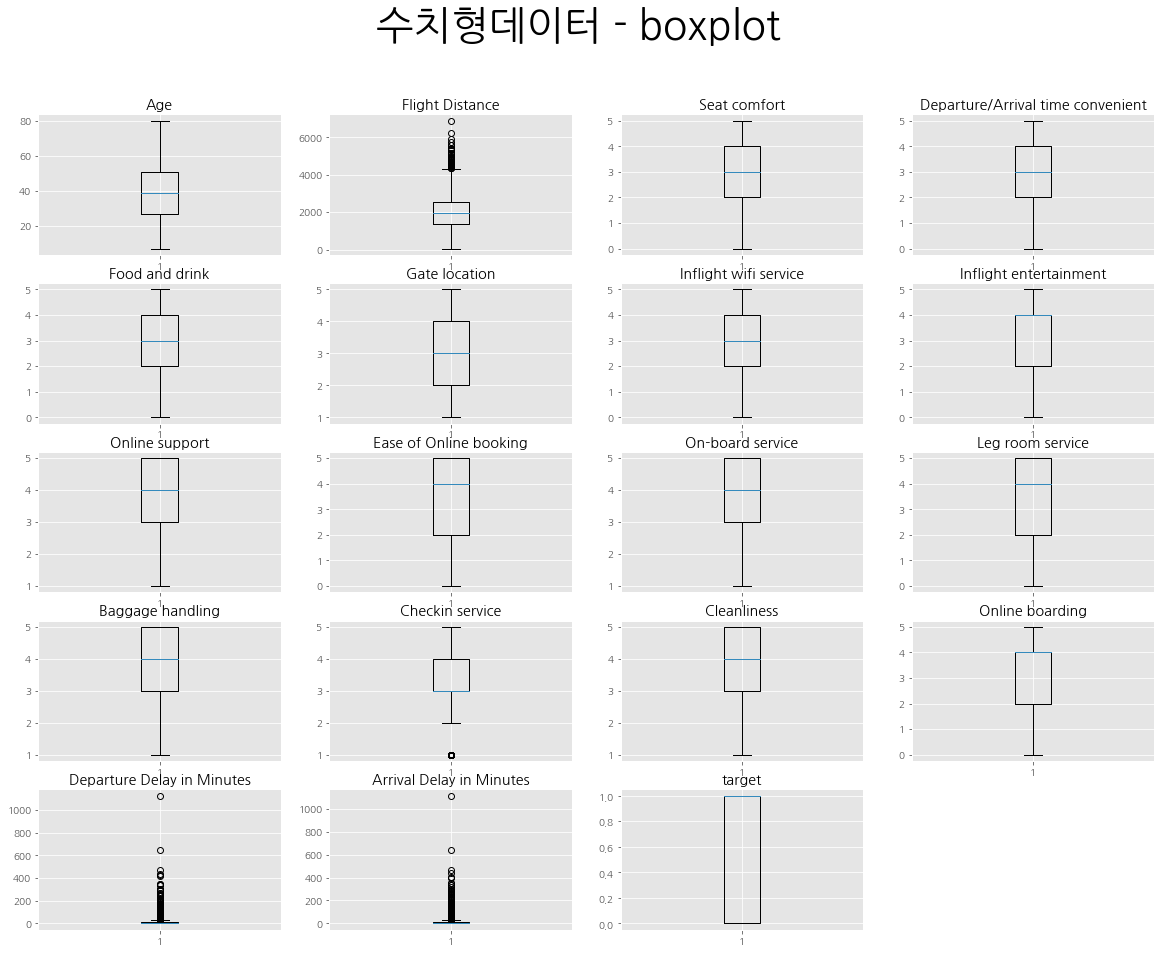

In [25]:
numeric_boxplots(train)

In [30]:
def numeric_vs_target(df):    
    
    # 수치형 데이터 분리
    #numeric_feature = data.columns[(data.dtypes=='int64') | (data.dtypes=='float')]
    num_data = df[numeric_features]

    # 박스플롯
    fig, axes = plt.subplots(4, 5, figsize=(25, 20))

    fig.suptitle('feature distributions per quality', fontsize= 40)
    for ax, col in zip(axes.flat, num_data.columns[:-1]):
       
        sns.boxplot(x= 'target', y= col, ax=ax, data=num_data)
        ax.set_title(col, fontsize=20,color = "b")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

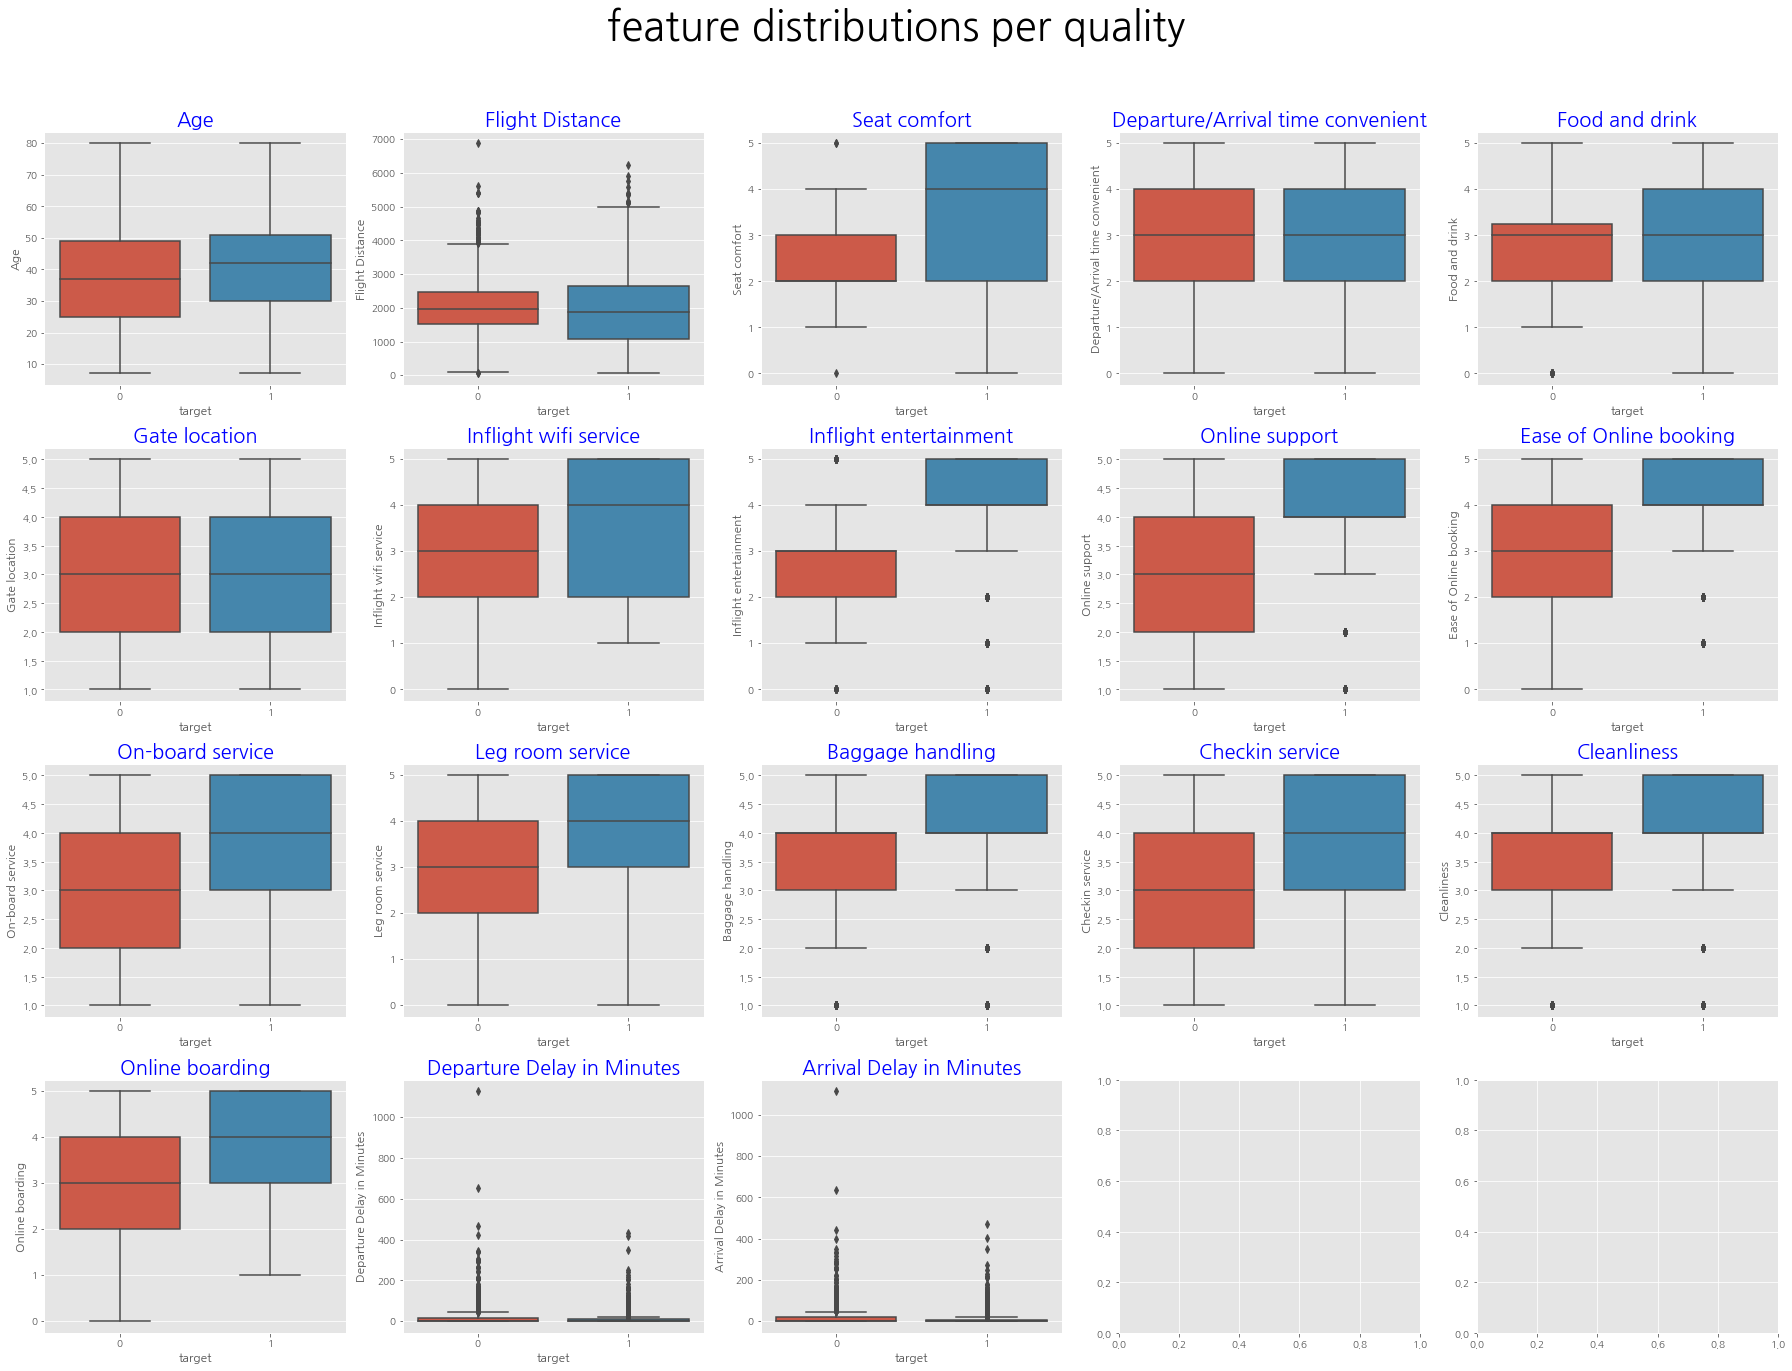

In [31]:
numeric_vs_target(train)

Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes 등의 박스플롯이 고르지 않음
1~3개씩 이상치들이 있는 feature들이 보임

# 데이터 분류하기     
# 
     
## 데이터의 속성에 따라서 numeric, ordianl, categorical로 나누어 분류

numeric features = 숫자형 자료 => Flight Distance 등의 숫자형 데이터.

ordinal features = 순서형 자료 => Seat comfort 등 (매우만족 > 만족 > 보통 > 불만족 > 매우불만족)의 설문순서를 가진 데이터.

categorical features = 범주형 자료 => 남자 / 여자 등 범주별로 나눠진 데이터.

In [33]:
numeric_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
ordinal_features = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
           'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 
           'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
target_features = ["target"]

# 데이터 훑어보기     
# 

## feature / target 그래프로 target과 feature의 관계를 파악


In [37]:
def features_vs_target(df):    
    
    # 수치형 데이터 분리
    #numeric_feature = data.columns[(data.dtypes=='int64') | (data.dtypes=='float')]
    #num_data = df[numeric_features]
    
    features = ordinal_features + categorical_features
    data = df[features]

    # 박스플롯
    fig, axes = plt.subplots(5, 4, figsize=(16, 22))

    fig.suptitle('feature / target', fontsize= 40)
    for ax, col in zip(axes.flat, data.columns[:-1]):
       
        sns.barplot(x= col, y= "target", ax=ax, data=data)
        ax.set_title(col, fontsize=20, color = "b")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

ValueError: Could not interpret input 'target'

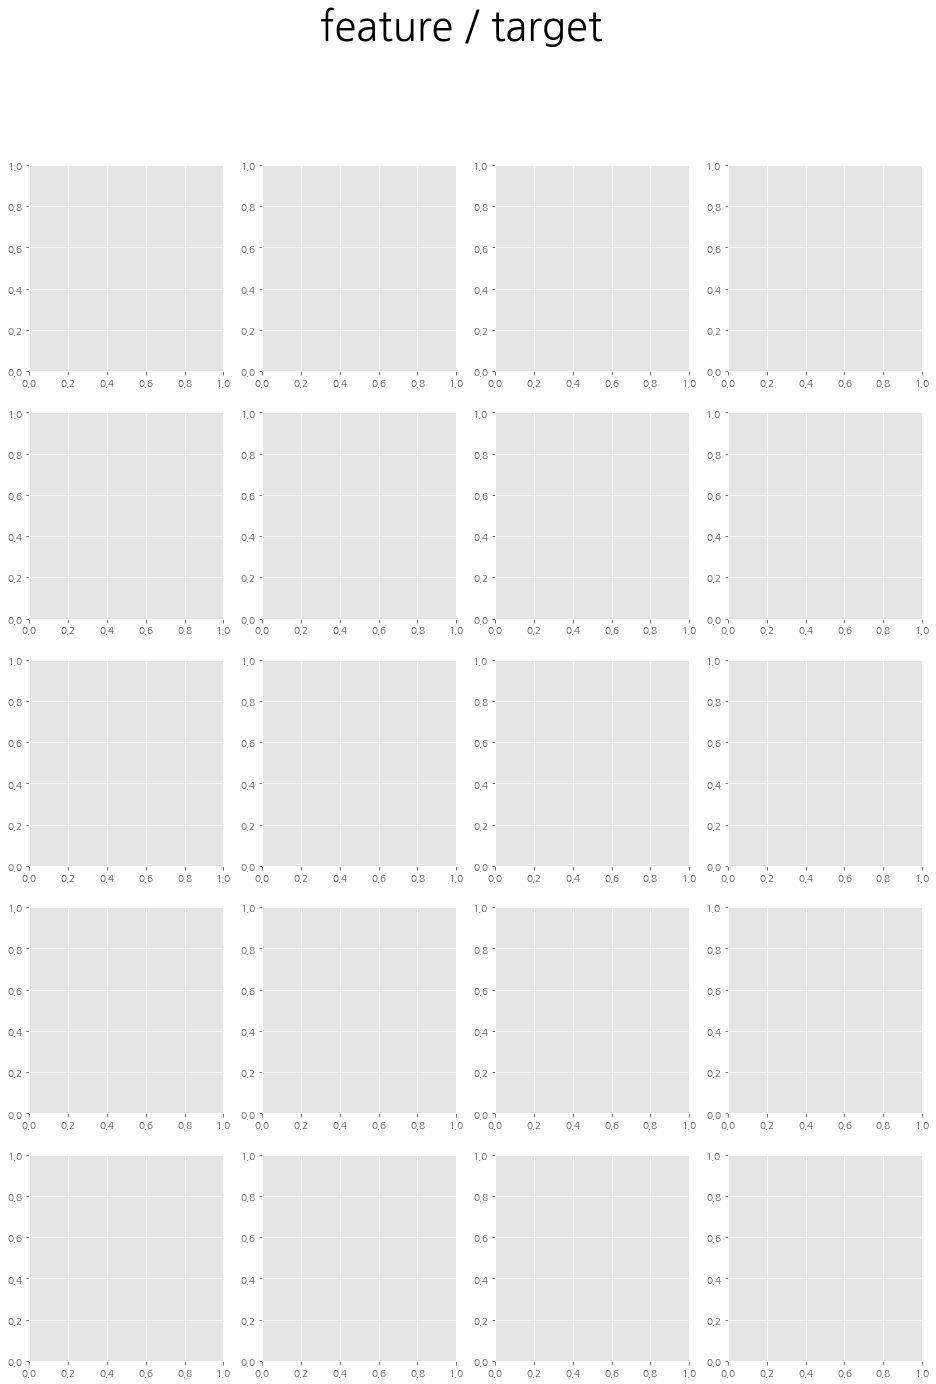

In [38]:
features_vs_target(train)

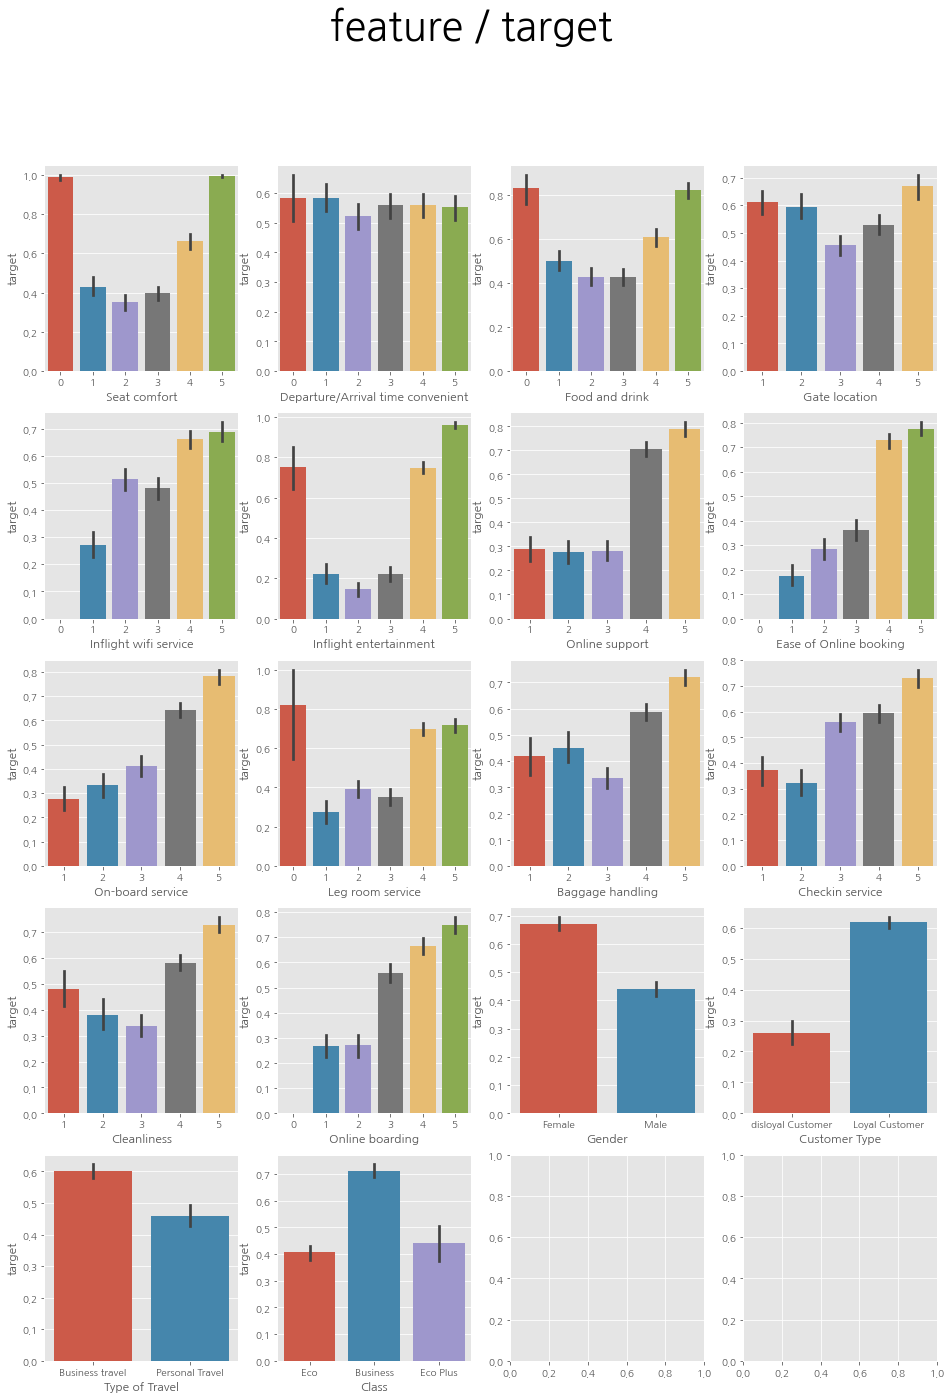

In [34]:
fig, ax = plt.subplots(5,4,figsize = (16,22))
plt.suptitle("feature / target ", fontsize = 40)

feature = ordinal_features + categorical_features

xvalue = 0
yvalue = 0

for xstr in feature :
    sns.barplot(x = xstr, y = "target", data = train, ax = ax[yvalue][xvalue])
    
    if xvalue == 3:
        xvalue = 0
        yvalue += 1
    
    else :
        xvalue += 1